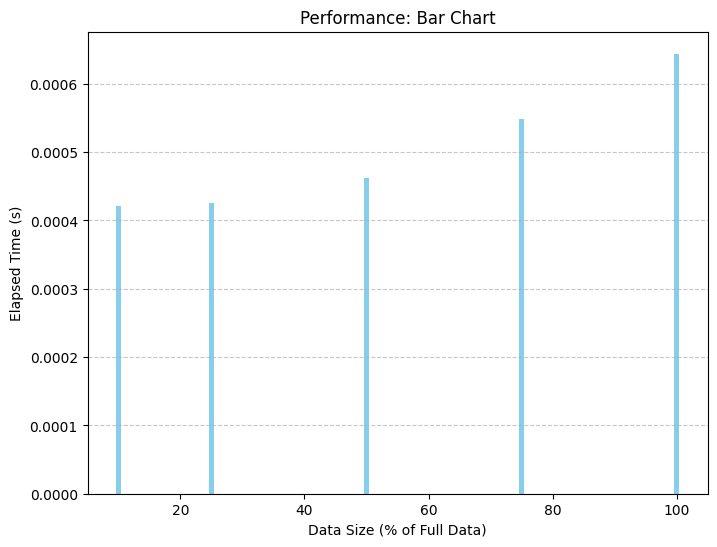

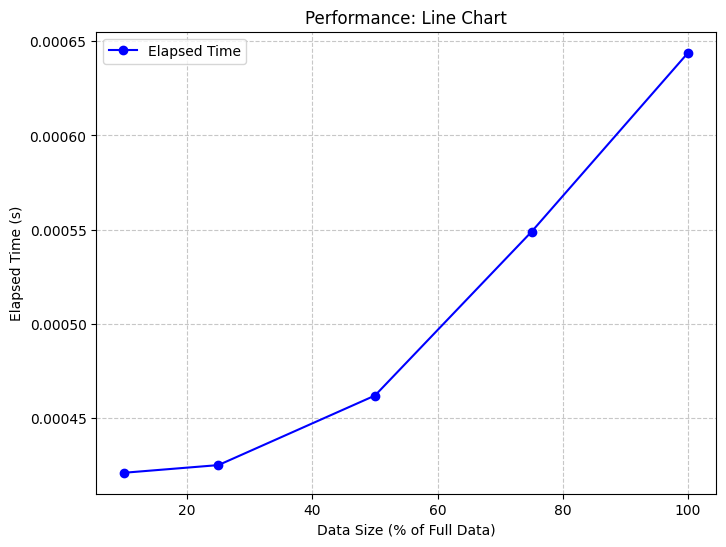

In [5]:
import pandas as pd
import time
import matplotlib.pyplot as plt

# 1. Daten laden
flood_data = pd.read_csv('../data/generated/flood_data.csv')  # Pfad zur Datei anpassen
rain_data = pd.read_csv('../data/generated/rain_data.csv')    # Pfad zur Datei anpassen
regions_data = pd.read_csv('../data/generated/regions_ch.csv')  # Pfad zur Datei anpassen

# 2. Performance-Testfunktion
def measure_performance(data, fractions):
    performance_results = []
    
    for fraction in fractions:
        # Datenanteil reduzieren
        sampled_data = data.sample(frac=fraction, random_state=42)
        
        # Zeitmessung starten
        start_time = time.time()
        
        # Simuliere Verarbeitung (z. B. Berechnungen)
        sampled_data['Losses (mln EUR, 2020)'] = sampled_data['Losses (mln EUR, 2020)'].fillna('< 1 mln EUR')
        sampled_data['marker_size'] = sampled_data.apply(
            lambda row: max(10, float(row['Losses (mln EUR, 2020)']) / 10) if row['Losses (mln EUR, 2020)'] != '< 1 mln EUR' else 10,
            axis=1
        )
        
        # Zeitmessung beenden
        elapsed_time = time.time() - start_time
        performance_results.append((fraction, elapsed_time))
    
    # Ergebnisse als DataFrame
    return pd.DataFrame(performance_results, columns=['Data Fraction', 'Elapsed Time (s)'])

# 3. Datenanteile und Performance messen
data_fractions = [0.1, 0.25, 0.5, 0.75, 1.0]
performance_df = measure_performance(flood_data, data_fractions)

# 4. Ergebnisse speichern (optional)
performance_df.to_csv('performance_results.csv', index=False)

# 5. Diagramme erstellen
# Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(performance_df['Data Fraction'] * 100, performance_df['Elapsed Time (s)'], color='skyblue')
plt.title('Performance: Bar Chart')
plt.xlabel('Data Size (% of Full Data)')
plt.ylabel('Elapsed Time (s)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Line Chart
plt.figure(figsize=(8, 6))
plt.plot(performance_df['Data Fraction'] * 100, performance_df['Elapsed Time (s)'], marker='o', color='blue', label='Elapsed Time')
plt.title('Performance: Line Chart')
plt.xlabel('Data Size (% of Full Data)')
plt.ylabel('Elapsed Time (s)')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend()
plt.show()